## Correlation of COVID-19 cases in the Municipalities of Mexico vs Comorbilities (Obesity, Hypertension, Diabetes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import COVID-19 cases data in Municipalities

In [2]:
dfcvcases = pd.read_csv('../Data/week1analyzesMunicipalities.csv')
dfcvcases.sort_values('cve_ent',inplace=True, ascending = True)
dfcvcases.head()

,cve_ent,municipalitie,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
42,1001,Aguascalientes,961977,22076,2294.857361,70.687761,2143,222.770399,7.484586
143,1002,Asientos,50864,464,912.236552,29.490406,36,70.776974,1.966027
262,1003,Calvillo,60760,982,1616.194865,8.229098,26,42.791310,0.000000
461,1004,Cosio,16918,130,768.412342,29.554321,12,70.930370,0.000000
817,1005,Jesus Maria,130184,779,598.383826,16.131015,62,47.624900,0.768144


In [3]:
dfcvcases.shape

(2457, 9)

In [4]:
dfcvcases['cve_ent'] = dfcvcases['cve_ent'].apply(lambda i: f'{i:05d}')

#### Import comorbilities data in Mexico 
##### Source:[https://www.inegi.org.mx/investigacion/pohd/2018/#Tabulados]

In [5]:
dfcomorb = pd.read_excel('../Data/comorbilidades_2018.xlsx', 
                         skiprows = range(0, 2), 
                         usecols=["Identificador único del municipio", 
                                  "Clave de entidad federativa", 
                                  "Entidad federativa", 
                                  "Clave de municipio o delegación", 
                                  "Municipio o delegación", "Estimador", 
                                  "Porcentaje de población de 20 años y más con obesidad.",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de diabetes."])
#, nrows =32)
dfcomorb.head()

,Identificador único del municipio,Clave de entidad federativa,Entidad federativa,Clave de municipio o delegación,Municipio o delegación,Estimador,Porcentaje de población de 20 años y más con obesidad.,Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.,Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
1,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Error estándar,0.640200,0.301570,0.206737
2,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite inferior de confianza,35.021848,17.888941,9.981286
3,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite superior de confianza,37.127918,18.881019,10.661392
4,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Coeficiente de variación,1.774641,1.640308,10.321339


In [6]:
dfcomorb.rename(columns={"Identificador único del municipio":"cve_ent", 
                                  "Clave de entidad federativa":"code_state", 
                                  "Entidad federativa":"state", 
                                  "Clave de municipio o delegación":"code_municip", 
                                  "Municipio o delegación":"municipalitie",
                                  "Estimador":"estimator", 
                                  "Porcentaje de población de 20 años y más con obesidad.":"pct_obesity_up20years",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de hipertensión.":"pct_hypertension_up20years",
                                  "Porcentaje de población de 20 años y más con diagnóstico previo de diabetes.":"pct_diabetes_up20years"},
                                  inplace=True)
dfcomorb.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
1,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Error estándar,0.640200,0.301570,0.206737
2,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite inferior de confianza,35.021848,17.888941,9.981286
3,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Límite superior de confianza,37.127918,18.881019,10.661392
4,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Coeficiente de variación,1.774641,1.640308,10.321339


In [7]:
dfcomorb.dtypes

cve_ent                        object
code_state                    float64
state                          object
code_municip                  float64
municipalitie                  object
estimator                      object
pct_obesity_up20years         float64
pct_hypertension_up20years    float64
pct_diabetes_up20years        float64
dtype: object

In [8]:
df_value = dfcomorb['estimator'] == "Valor"
df_value.head()

0     True
1    False
2    False
3    False
4    False
Name: estimator, dtype: bool

In [9]:
dfcomorbv=dfcomorb[df_value]
dfcomorbv.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,00000,0.0,Estados Unidos Mexicanos,0.0,Total,Valor,36.074883,18.384980,10.321339
5,01000,1.0,Aguascalientes,0.0,Total,Valor,32.593387,14.700566,7.556478
10,01001,1.0,Aguascalientes,1.0,Aguascalientes,Valor,31.486541,14.942242,7.495861
15,01002,1.0,Aguascalientes,2.0,Asientos,Valor,32.282284,15.320425,7.953634
20,01003,1.0,Aguascalientes,3.0,Calvillo,Valor,40.004293,13.751906,9.172624


In [10]:
dfcomorbv.shape

(2490, 9)

In [11]:
dfcomorbv = dfcomorbv.query("municipalitie != 'Total'").copy()
dfcomorbv.shape

(2457, 9)

In [12]:
dfcomorbv.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
10,01001,1.0,Aguascalientes,1.0,Aguascalientes,Valor,31.486541,14.942242,7.495861
15,01002,1.0,Aguascalientes,2.0,Asientos,Valor,32.282284,15.320425,7.953634
20,01003,1.0,Aguascalientes,3.0,Calvillo,Valor,40.004293,13.751906,9.172624
25,01004,1.0,Aguascalientes,4.0,Cosío,Valor,32.596450,16.431493,7.383116
30,01005,1.0,Aguascalientes,5.0,Jesús María,Valor,34.731715,12.356755,6.745819


In [13]:
dfcomorbv.sort_values('cve_ent',inplace=True, ascending = True)
dfcomorbv.head()

,cve_ent,code_state,state,code_municip,municipalitie,estimator,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
10,01001,1.0,Aguascalientes,1.0,Aguascalientes,Valor,31.486541,14.942242,7.495861
15,01002,1.0,Aguascalientes,2.0,Asientos,Valor,32.282284,15.320425,7.953634
20,01003,1.0,Aguascalientes,3.0,Calvillo,Valor,40.004293,13.751906,9.172624
25,01004,1.0,Aguascalientes,4.0,Cosío,Valor,32.596450,16.431493,7.383116
30,01005,1.0,Aguascalientes,5.0,Jesús María,Valor,34.731715,12.356755,6.745819


In [14]:
dfcomorbv=dfcomorbv.drop(['code_state', 'state', 'code_municip','municipalitie','estimator'], axis=1).copy()
dfcomorbv.head()

,cve_ent,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
10,01001,31.486541,14.942242,7.495861
15,01002,32.282284,15.320425,7.953634
20,01003,40.004293,13.751906,9.172624
25,01004,32.596450,16.431493,7.383116
30,01005,34.731715,12.356755,6.745819


In [15]:
#dfcomorbv.astype({'cve_ent': 'int64'}).dtypes
#dfcomorbv4=dfcomorbv3['pct_obesity_up20years','pct_hypertension_up20years','pct_diabetes_up20years'].astype(int)
#dfcomorbv.cve_ent = dfcomorbv.cve_ent.astype(int64)


In [16]:
#dfcomorbv.astype(int)
#dfcomorbv.astype('int32').dtypes


In [17]:
dfcomorbv.head()

,cve_ent,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
10,01001,31.486541,14.942242,7.495861
15,01002,32.282284,15.320425,7.953634
20,01003,40.004293,13.751906,9.172624
25,01004,32.596450,16.431493,7.383116
30,01005,34.731715,12.356755,6.745819


#### Merge Dataframes (COVID Cases / Comorbilities)

In [18]:
dfAll = pd.merge(dfcvcases, dfcomorbv,  on='cve_ent')
dfAll.head()

,cve_ent,municipalitie,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days,pct_obesity_up20years,pct_hypertension_up20years,pct_diabetes_up20years
0,01001,Aguascalientes,961977,22076,2294.857361,70.687761,2143,222.770399,7.484586,31.486541,14.942242,7.495861
1,01002,Asientos,50864,464,912.236552,29.490406,36,70.776974,1.966027,32.282284,15.320425,7.953634
2,01003,Calvillo,60760,982,1616.194865,8.229098,26,42.791310,0.000000,40.004293,13.751906,9.172624
3,01004,Cosio,16918,130,768.412342,29.554321,12,70.930370,0.000000,32.596450,16.431493,7.383116
4,01005,Jesus Maria,130184,779,598.383826,16.131015,62,47.624900,0.768144,34.731715,12.356755,6.745819


<AxesSubplot:>

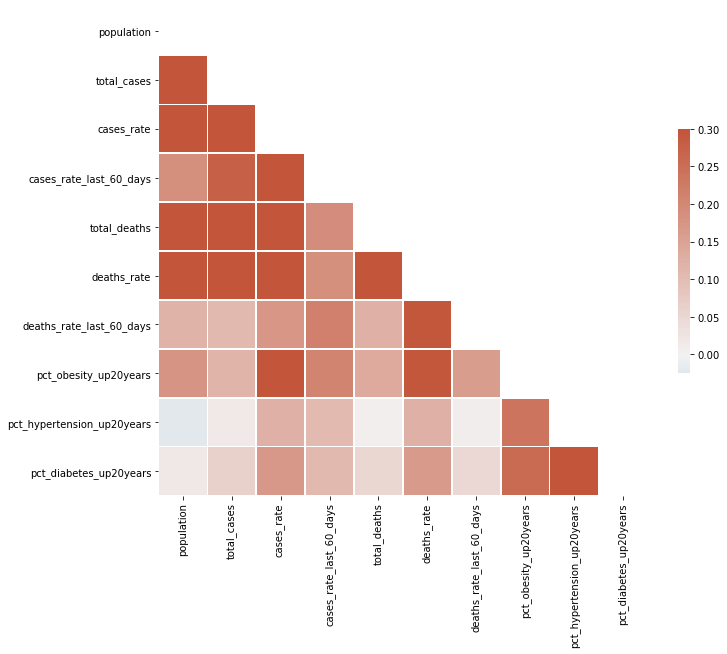

In [19]:
# Compute the correlation matrix
corr = dfAll.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
dfAll.to_csv('../Data/ComorbilitiesMunicipalities.csv', index=False)